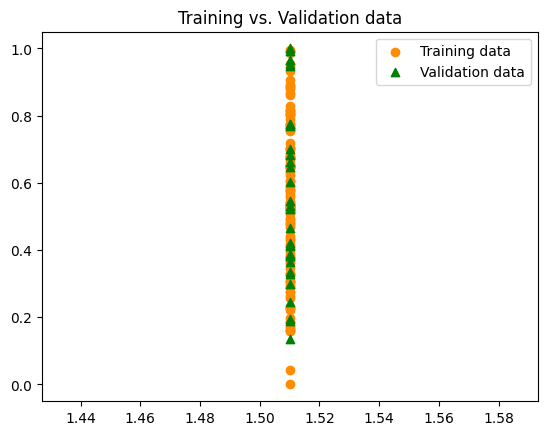

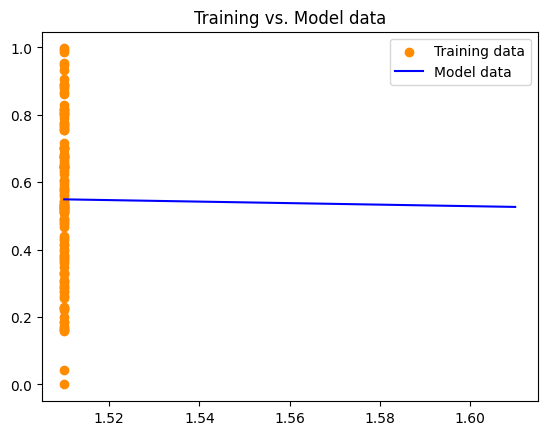

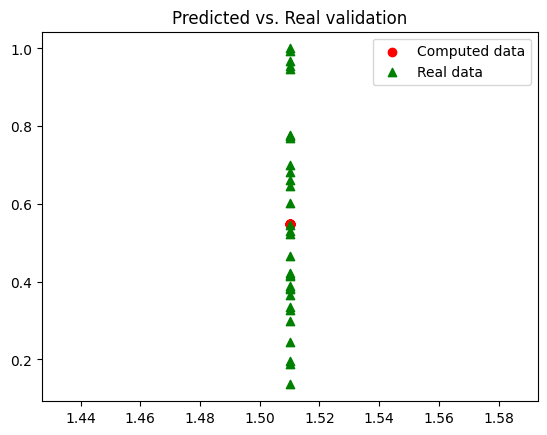

Coefficients: (0.8882971814646574, -0.22450662753346864)
Prediction error (manual): 0.06345672442742474
Prediction error (sklearn tool): 0.06345672442742474


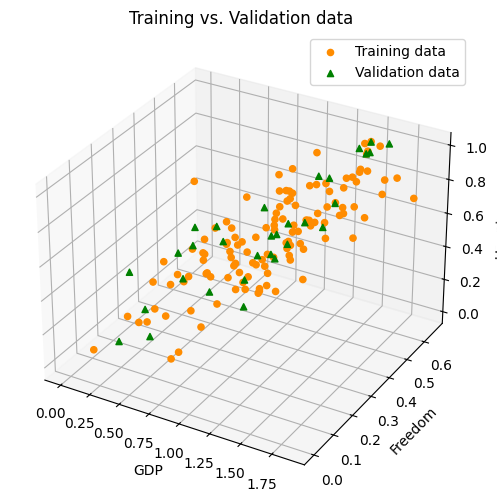

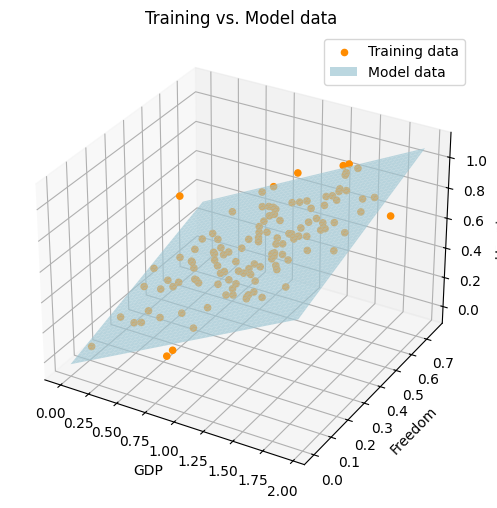

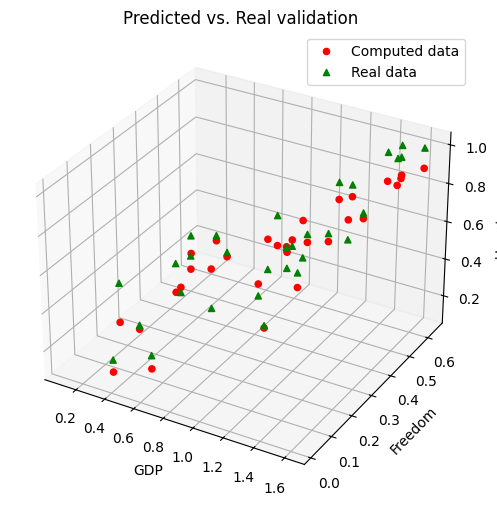

Coefficients: (-0.03398715062223756, 0.3873531579038789, 0.4778589387818847)
Prediction error (manual): 0.011840383296346126
Prediction error (sklearn tool): 0.011840383296346126


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics, preprocessing

from myLiniarRegressor import MyLiniarRegressor

def load_data(path: str) -> pd.DataFrame:
    '''
        Loads data from a csv file.
    '''
    df = pd.read_csv(path)
    return df

def handle_missing_data(df: pd.DataFrame):
    '''
        Handles the missing data by replacing with the default null value.
        
        @param df: A pandas DataFrame containing the read data.
    '''
    df.fillna(df.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

def load_features(df: pd.DataFrame, feature_input: list, feature_output) -> tuple:
    '''
        Extracts the feature values of input and output from a data frame.
        
        @param df: A pandas DataFrame containing some studied features.
        @param feature_input: List of input features that we study.
        @param feature_output1: The feature that is studied.
    '''
    handle_missing_data(df)
    return [df[feature_input[i]].to_list() for i in range(len(feature_input))], df[feature_output].to_list()

def split_data(n: int):
    '''
        Splits the data between training and validation.
        
        @param n: Size of the data studied.
    '''
    np.random.seed(5)
    
    indexes = [i for i in range(n)]
    
    train_sample = np.random.choice(indexes, int(0.8 * n), replace=False)
    validation_sample = [i for i in indexes if i not in train_sample]
    
    return train_sample, validation_sample

def plot_data_two_features(t_in=None, t_out=None, c_in=None, c_out=None, v_in=None, v_out=None, m_in=None, m_out=None, title = None):
    '''
        Plots training, validation and model predictions on a 3D plane.
        
        @param t_in: Training inputs.
        @param t_out: Training outputs.
        @param c_in: Computed input.
        @param c_out: Computed output.
        @param v_in: Validation inputs.
        @param v_out: Validation outputs.
        @param m_in: Model inputs.
        @param m_out: Model predictions (outputs).
        @param title: Title of the plot.
    '''
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection='3d')
    
    if t_in and v_in:
        ax.scatter(t_in[0], t_in[1], t_out, alpha=1.0, marker='o', color='darkorange', label='Training data')
        ax.scatter(v_in[0], v_in[1], v_out, alpha=1.0, marker='^', color='green', label='Validation data')
    if t_in and m_in:
        ax.scatter(t_in[0], t_in[1], t_out, alpha=1.0, marker='o', color='darkorange', label='Training data')
        ax.plot_surface(m_in[0], m_in[1], m_out, alpha=0.7, color='lightblue', label='Model data')
    if c_in and v_in:
        ax.scatter(c_in[0], c_in[1], c_out, alpha=1.0, marker='o', color='red', label='Computed data')
        ax.scatter(v_in[0], v_in[1], v_out, alpha=1.0, marker='^', color='green', label='Real data')
    
    ax.set_xlabel('GDP')
    ax.set_ylabel('Freedom')
    ax.set_zlabel('Happiness')
    
    plt.title(title)
    plt.legend()
    plt.show()

def plot_data_one_feature(t_in=None, t_out=None, c_in=None, c_out=None, v_in=None, v_out=None, m_in=None, m_out=None, title = None):
    '''
        Plots training, validation and model predictions on a 2D plane.
        
        @param t_in: Training inputs.
        @param t_out: Training outputs.
        @param c_in: Computed input.
        @param c_out: Computed output.
        @param v_in: Validation inputs.
        @param v_out: Validation outputs.
        @param m_in: Model inputs.
        @param m_out: Model predictions (outputs).
        @param title: Title of the plot.
    '''
    
    if t_in and v_in:
        plt.scatter(t_in[0], t_out, alpha=1.0, marker='o', color='darkorange', label='Training data')
        plt.scatter(v_in[0], v_out, alpha=1.0, marker='^', color='green', label='Validation data')
    if t_in and m_in:
        plt.scatter(t_in[0], t_out, alpha=1.0, marker='o', color='darkorange', label='Training data')
        plt.plot(m_in[0], m_out, 'b-', label='Model data')
    if c_in and v_in:
        plt.scatter(c_in[0], c_out, alpha=1.0, marker='o', color='red', label='Computed data')
        plt.scatter(v_in[0], v_out, alpha=1.0, marker='^', color='green', label='Real data')
        
    plt.title(title)
    plt.legend()
    plt.show()

def normalize_data(inputs: list, outputs: list) -> tuple:    
    '''
        Normalizes the values of the feature to get them in [0, 1].
        
        @param inputs: List of lists containing the values of the input features.
        @param outputs: List containing the values of the output feature.
    '''
    scaler = preprocessing.MinMaxScaler()
    
    for _input in inputs:
        _input = scaler.fit_transform(np.array(_input).reshape(-1, 1)).reshape(-1, len(_input))[0].tolist()
    
    outputs = scaler.fit_transform(np.array(outputs).reshape(-1, 1)).reshape(-1, len(outputs))[0].tolist()
    
    return inputs, outputs

def train_model(regressor: linear_model.LinearRegression | MyLiniarRegressor, t_in: list, t_out: list):
    '''
        Trains a linear regression model.
        
        @param regressor: LinearRegression model.
        @param t_in: Training inputs.
        @param t_out: Training outputs.
    '''
    zipped = t_in[0]
    for i in range(1, len(t_in)):
        zipped = zip(zipped, t_in[i])
    zipped = list(zipped)
    
    if len(t_in) > 1:
        xx = [[x[i] for i in range(len(x))] for x in zipped]
    else:
        xx = [[x] for x in zipped]
    regressor.fit(xx, t_out)
    
    w0, w = regressor.intercept_, regressor.coef_[0:]
    return w0, w

def training_predict_model(w: list, t_in: list):
    '''
        Determines the predictions of the model based on the training data.
        
        @param w: Weights.
        @param t_in: Training input.
    '''
    mins, maxs = [], []
    
    for i in range(len(t_in)):
        mins.append(min(t_in[i]))
        maxs.append(max(t_in[i]))
    
    noOfPoints = 100
    epsilon = 0.1
    xref = np.meshgrid(*[np.arange(mins[i], maxs[i] + 0.1, (maxs[i] - mins[i] + epsilon) / noOfPoints) for i in range(len(t_in))])

    yref = w[0]
    for i in range(len(t_in)):
        yref += w[i + 1] * xref[i]
        
    return xref, yref

def predict(regressor: linear_model.LinearRegression, v_in: list) -> list:
    '''
        Predicts a the outputs based on a list of inputs using a sklearn LinearRegression model.
        
        @param regressor: LinearRegression model used for prediction.
        @param v_in: Validation inputs.
    '''
    v_in = list(zip(*v_in))
    return regressor.predict(v_in)

def compute_error(y_true, y_pred) -> float:
    '''
        Computes the mean squared error of a prediction.
        
        @param y_true: The ground truth.
        @param y_pred: The prediction made.
    '''
    error = 0.0
    
    for t1, t2 in zip(y_true, y_pred):
        error += (t1 - t2) ** 2
    
    return error / len(y_true)

def split_input_output(training: list, validation: list, inputs: list, outputs: list):
    training_input = [[inputs[j][i] for i in training] for j in range(len(inputs))]
    training_output = [outputs[i] for i in training]
    
    validation_input = [[inputs[j][i] for i in validation] for j in range(len(inputs))]
    validation_output = [outputs[i] for i in validation]
    
    return training_input, training_output, validation_input, validation_output

def one_feature():
    df = load_data("data/v1_world-happiness-report-2017.csv")
    #df = load_data("data/v2_world-happiness-report-2017.csv")
    #df = load_data("data/v3_world-happiness-report-2017.csv")
    
    # Loading the input and output features.
    inputs, outputs = load_features(df, ['Family'], 'Happiness.Score')    
    inputs, outputs = normalize_data(inputs, outputs)
    
    # Splitting the date into training/validation samples.
    training, validation = split_data(len(inputs[0]))
    
    # Splitting the inputs and outputs.
    X_train, y_train, X_test, y_test = split_input_output(training, validation, inputs, outputs)
    
    # Plotting the training and validation samples.
    plot_data_one_feature(t_in=X_train, t_out=y_train, v_in=X_test, v_out=y_test, title='Training vs. Validation data')
    
    # Extracting the weights based on the studied features.
    regressor = linear_model.LinearRegression()
    # regressor = MyLiniarRegressor()
    w0, w = train_model(regressor, X_train, y_train)
    w1 = w[0]
    
    # Extracting the predictions made by the model with respect with the training sample.
    model_input, model_output = training_predict_model([w0, w1], X_train)
    plot_data_one_feature(t_in=X_train, t_out=y_train, m_in=model_input, m_out=model_output, title='Training vs. Model data')
    
    # Determining a prediction made by the model.
    computed_validation_output = predict(regressor, X_test)
    plot_data_one_feature(c_in=X_test, c_out=computed_validation_output, v_in=X_test, v_out=y_test, title='Predicted vs. Real validation')
    
    print(f"Coefficients: {w0, w1}")
    
    # Computing the error using the mean square method.
    error = compute_error(y_test, computed_validation_output)
    print(f"Prediction error (manual): {error}")
    
    error = metrics.mean_squared_error(y_test, computed_validation_output)
    print(f"Prediction error (sklearn tool): {error}")

def two_features():
    df = load_data("data/v1_world-happiness-report-2017.csv")
    #df = load_data("data/v2_world-happiness-report-2017.csv")
    #df = load_data("data/v3_world-happiness-report-2017.csv")
    
    # Loading the input and output features.
    inputs, outputs = load_features(df, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
    inputs, outputs = normalize_data(inputs, outputs)
    
    # Splitting the data into training/validation samples.
    training, validation = split_data(len(inputs[0]))
    
    # Splitting the inputs and outputs.
    X_train, y_train, X_test, y_test = split_input_output(training, validation, inputs, outputs)
    
    # Plotting the training and validation samples.
    plot_data_two_features(t_in=X_train, t_out=y_train, v_in=X_test, v_out=y_test, title='Training vs. Validation data')
    
    # Extracting the weights based on the training features.
    # regressor = linear_model.LinearRegression()
    regressor = MyLiniarRegressor()
    w0, w = train_model(regressor, X_train, y_train)
    w1, w2 = w[0], w[1]
    
    # Extracting the predictions made by the model with respect with the training sample.
    model_input, model_output = training_predict_model([w0, w1, w2], X_train)
    plot_data_two_features(t_in=X_train, t_out=y_train, m_in=model_input, m_out=model_output, title='Training vs. Model data')
    
    # Determining a prediction made by the model.
    computed_validation_output = predict(regressor, X_test)
    plot_data_two_features(c_in=X_test, c_out=computed_validation_output, v_in=X_test, v_out=y_test, title='Predicted vs. Real validation')
    
    print(f"Coefficients: {w0, w1, w2}")
    
    # Computing the error using the mean square method.
    error = compute_error(y_test, computed_validation_output)
    print(f"Prediction error (manual): {error}")
    
    error = metrics.mean_squared_error(y_test, computed_validation_output)
    print(f"Prediction error (sklearn tool): {error}")
 
#one_feature()   
two_features()